# Iniciando a prática em algoritmos de inteligência artificial

- Nessa prática utilizei os algoritmos de KNN, Árvore de decisão e Regressão Logística para tentar criar uma previsão.

- A base de dados escolhida foi um .csv que contém informações sobre passageiros do titanic. Com base nisso, os modelos receber dados iniciais de treinamento e realizam uma predição se o passageiro sobreviveu ou não.

In [18]:
# Começando pelo tratamento dos dados da base
import pandas as pd

# Eliminando coluna cabin e outros dados inconsistentes
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/titanic_train.csv')
base = base.drop('Cabin', axis=1)
base = base.dropna()

# Eliminando colunas que possuem os dados do tipo "Object"

base = base.drop(base.dtypes[base.dtypes.values == 'object'].index, axis=1)

display(base.dtypes)


,0
PassengerId,int64
Survived,int64
Pclass,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64


In [19]:
# Definindo o x e o y que serão utilizados para treino

x= base.drop('Survived', axis=1)
y= base['Survived']

# Algoritmo de KNN - KNeighboors Classifier

- O algoritmo trabalha a previsão classificando o dado de amostra em relação a seus K vizinhos mais próximos, realizando uma análise da maioria.

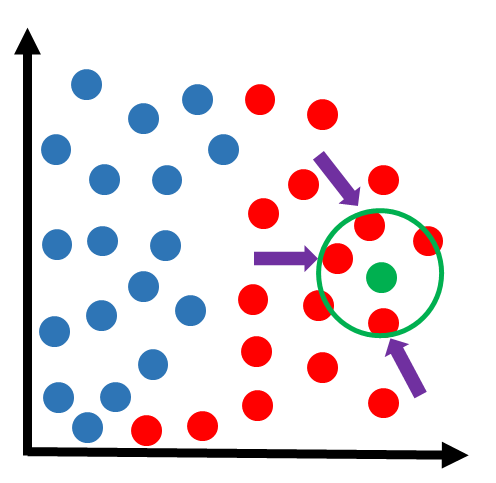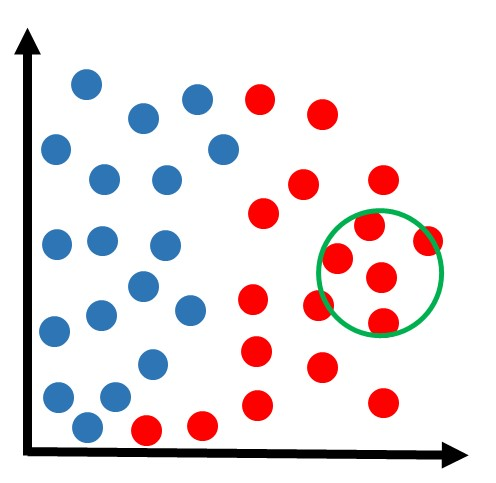

In [20]:
# Importando e treinando o KNN

from sklearn.neighbors import KNeighborsClassifier

classificador_neigh = KNeighborsClassifier(n_neighbors=5)
classificador_neigh.fit(x,y)

# Verificando o score do KNN

classificador_neigh.score(x,y)

0.7556179775280899

# Algoritmo de Árvore de decisão

- O algoritmo de árvore de decisão como o nome já diz, trabalha realmente gerando uma árvore de decisões com vários pontos de decisão ou "Nós" que levam a vários caminhos que serão os ramos.

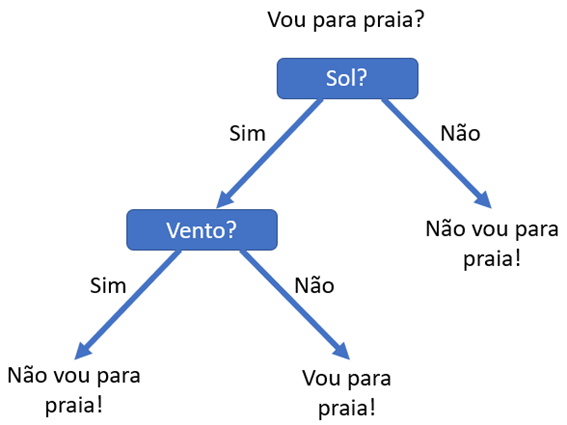

In [21]:
# Importando e treinando a árvore de decisão

from sklearn.tree import DecisionTreeClassifier

classificador_arvore = DecisionTreeClassifier()
classificador_arvore.fit(x,y)

# Verificando o score da árvore de decisão

classificador_arvore.score(x,y)

1.0

# Algoritmo de Regressão Logística

- A regressão logística é um modelo estatístico que usa a função logística, ou função logit, em matemática como a equação entre x e y. A função logit mapeia y como uma função sigmoide de x.

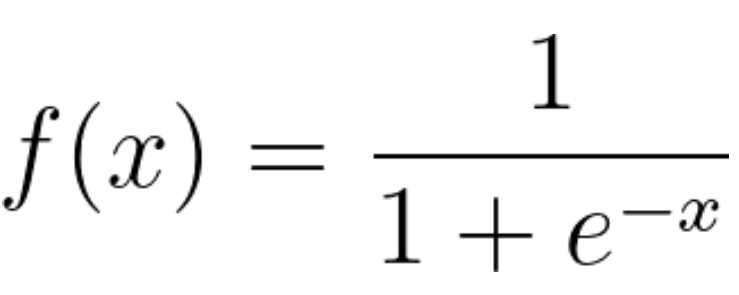

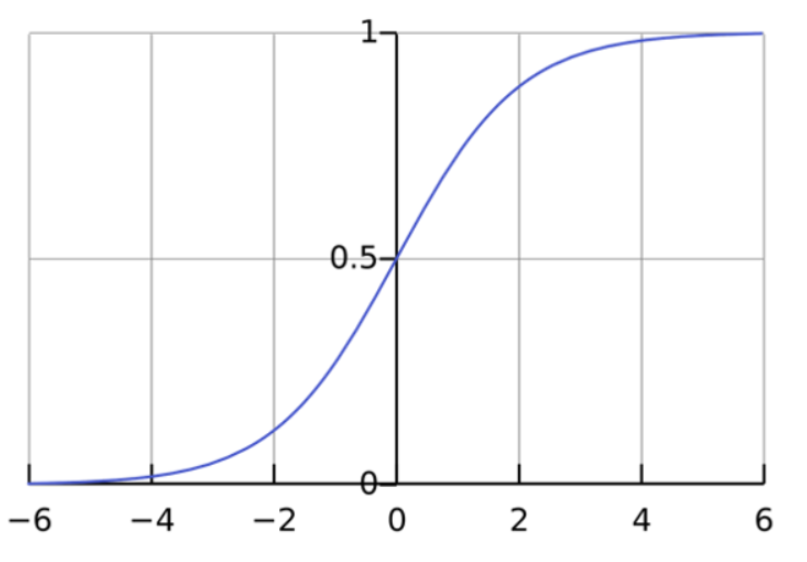

A função logit retorna somente valores entre 0 e 1 para a variável dependente, quaisquer que sejam os valores da variável independente. É assim que a regressão logística estima o valor da variável dependente.

In [22]:
# Importando a regressão logística

from sklearn.linear_model import LogisticRegression

classificador_reg = LogisticRegression(max_iter=1000)
classificador_reg.fit(x,y)

# Verificando o score da regressão logística

classificador_reg.score(x,y)

0.7064606741573034

# Trecho de testes

In [23]:
# Importando base de testes

base_teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/titanic_test.csv')

# Tratando dados da base de teste

base_teste = base_teste.drop(['Cabin'], axis=1)
base_teste = base_teste.dropna()
base_teste = base_teste.drop(base_teste.dtypes[base_teste.dtypes == 'object'].index, axis=1)
display(base_teste.info())

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Age          331 non-null    float64
 4   SibSp        331 non-null    int64  
 5   Parch        331 non-null    int64  
 6   Fare         331 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 20.7 KB


None

In [24]:
# Definindo X e Y de teste

x_teste = base_teste.drop('Survived', axis=1)
y_teste = base_teste.Survived


In [25]:
# Realizando testes com os modelos já treinados

pred_knn = classificador_neigh.predict(x_teste)
pred_arvore = classificador_arvore.predict(x_teste)
pred_reg = classificador_reg.predict(x_teste)

# Matriz de confusão

- A matriz de confusão é calculada pela função de pesquisa Classificação. Ela exibe a distribuição dos registros em termos de suas classes atuais e de suas classes previstas. Isso indica a qualidade do modelo atual. Um modelo pode conter duas ou mais classes previstas.

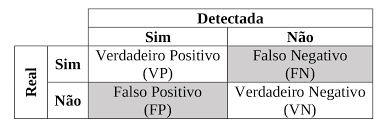

In [26]:
# Importando matriz de confusão

from sklearn.metrics import confusion_matrix

# Aplicando matriz nos resultados obtidos pelos modelos

matriz_knn = confusion_matrix(y_teste, pred_knn)
matriz_arvore = confusion_matrix(y_teste, pred_arvore)
matriz_reg = confusion_matrix(y_teste, pred_reg)


In [27]:
# Verificando matriz para KNN

matriz_knn



array([[180,  24],
       [ 98,  29]])

In [28]:
# Verificando matriz para Árvore

matriz_arvore

array([[115,  89],
       [ 46,  81]])

In [29]:
# Verificando matriz para Regressão

matriz_reg

array([[131,  73],
       [ 64,  63]])

In [30]:
# Importando acurácia para avaliar os modelos

from sklearn.metrics import accuracy_score

# Acurácia para KNN

print("Acurácia do modelo KNN:")
print(accuracy_score(y_teste, pred_knn), '\n')

# Acurácia para a Árvore

print("Acurácia do modelo de Árvore de decisão:")
print(accuracy_score(y_teste, pred_arvore), '\n')

# Acurácia para a Regressão

print("Acurácia do modelo Regressão logística:")
print(accuracy_score(y_teste, pred_reg), '\n')

Acurácia do modelo KNN:
0.6314199395770392 

Acurácia do modelo de Árvore de decisão:
0.5921450151057401 

Acurácia do modelo Regressão logística:
0.5861027190332326 



In [31]:
# Importando o recall

from sklearn.metrics import recall_score

# Recall para KNN

print("Recall do modelo KNN:")
print(recall_score(y_teste, pred_knn), '\n')

# Recall para a Árvore

print("Recall do modelo de Árvore de decisão:")
print(recall_score(y_teste, pred_arvore), '\n')

# Recall para a Regressão

print("Recall do modelo Regressão logística:")
print(recall_score(y_teste, pred_reg), '\n')

Recall do modelo KNN:
0.2283464566929134 

Recall do modelo de Árvore de decisão:
0.6377952755905512 

Recall do modelo Regressão logística:
0.49606299212598426 



# Tratando os dados novamente

In [32]:
# Retratando a base de treino trocando os valores nulos da coluna 'Age' pela média
novo_teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/titanic_train.csv')
novo_teste.loc[novo_teste['Age'].isnull(), 'Age'] = novo_teste['Age'].median()
novo_teste = novo_teste.drop(['Name', 'PassengerId', 'Cabin'], axis=1)

# Tratando coluna 'sex' para nova coluna contendo apenas 0 ou 1
novo_teste['Sex'] = novo_teste['Sex'].map({'male': 0, 'female': 1})

# Transformando informações da coluna de embarque em colunas númericas para adicionar mais dados de treinamento
novo_teste = pd.get_dummies(novo_teste, columns=['Embarked'], dtype=int)

# Removendo valores inúteis
novo_teste = novo_teste.drop(novo_teste.dtypes[novo_teste.dtypes.values == 'object'].index, axis=1)
novo_teste = novo_teste.dropna()

In [33]:
# Recriando os dados de treino

X_treino = novo_teste.drop('Survived', axis=1)
y_treino = novo_teste['Survived']

# Recriando os dados de teste

X_teste = novo_teste.drop('Survived', axis=1)
y_teste = novo_teste['Survived']

# Recriando instâncias

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_treino, y_treino)

arvore = DecisionTreeClassifier()
arvore.fit(X_treino, y_treino)

reg = LogisticRegression(max_iter=1000)
reg.fit(X_treino, y_treino)

# Refazendo os predicts com os novos dados
pred_knn = knn.predict(X_teste)
pred_arvore = arvore.predict(X_teste)
pred_reg = reg.predict(X_teste)



In [34]:
# Refazendo as métricas para o modelo KNN
from sklearn.metrics import precision_score

print("Acurácia do modelo KNN:")
print(accuracy_score(y_teste, pred_knn), '\n')

print("Precisão do modelo KNN")
print(precision_score(y_teste, pred_knn), '\n')

print("Recall do modelo KNN:")
print(recall_score(y_teste, pred_knn), '\n')



Acurácia do modelo KNN:
0.8395061728395061 

Precisão do modelo KNN
0.8099688473520249 

Recall do modelo KNN:
0.7602339181286549 



In [35]:
# Refazendo as métricas para o modelo de Árvore

print("Acurácia do modelo de Árvore de decisão:")
print(accuracy_score(y_teste, pred_arvore), '\n')

print("Precisão do modelo de Árvore de decisão")
print(precision_score(y_teste, pred_arvore), '\n')

print("Recall do modelo de Árvore de decisão:")
print(recall_score(y_teste, pred_arvore), '\n')

Acurácia do modelo de Árvore de decisão:
0.9797979797979798 

Precisão do modelo de Árvore de decisão
0.9939024390243902 

Recall do modelo de Árvore de decisão:
0.9532163742690059 



In [36]:
# Refazendo as métricas para o modelo de Regressão Logística

print("Acurácia do modelo Regressão logística:")
print(accuracy_score(y_teste, pred_reg), '\n')

print("Precisão do modelo Regressão logística")
print(precision_score(y_teste, pred_reg), '\n')

print("Recall do modelo Regressão logística:")
print(recall_score(y_teste, pred_reg), '\n')

Acurácia do modelo Regressão logística:
0.8013468013468014 

Precisão do modelo Regressão logística
0.7619047619047619 

Recall do modelo Regressão logística:
0.7017543859649122 

